## 4.8　変数間の関係の調査

### 4.8.1　相関係数

In [1]:
import pandas as pd                 # pandasをpdの名で読込み
from scipy import stats             # scipy.statsの読込み
import numpy as np                  # NumPyのnpの名で読込み
import matplotlib.pyplot as plt     # matplotlibをpltの名で読込み

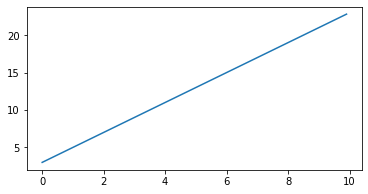

In [2]:
X = np.arange( 0, 10, 0.1 )     # データ列 X
Y = 2*X + 3                     # データ列 Y
plt.figure(figsize=(6,3))       # プロット
plt.plot(X,Y)
plt.show()

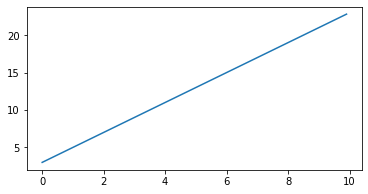

In [3]:
plt.figure(figsize=(6,3))       # プロット
plt.plot(X,Y)
plt.savefig('stCorr00.eps')

<Figure size 432x216 with 0 Axes>

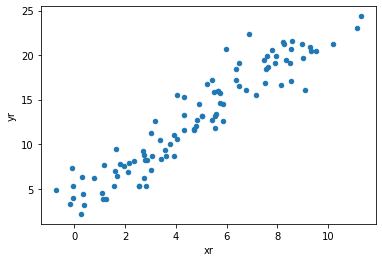

In [4]:
Xr = X + stats.norm.rvs( size=len(X) )  # データ列 X を撹乱
Yr = Y + stats.norm.rvs( size=len(Y) )  # データ列 Y を撹乱
# DataFrameの作成
df = pd.DataFrame(columns=('x','y','xr','yr'))
df['x']  = X;   df['y']  = Y
df['xr'] = Xr;  df['yr'] = Yr
plt.figure(figsize=(6,3))       # プロット
df.plot( kind='scatter', x='xr', y='yr' )
plt.show()

<Figure size 432x216 with 0 Axes>

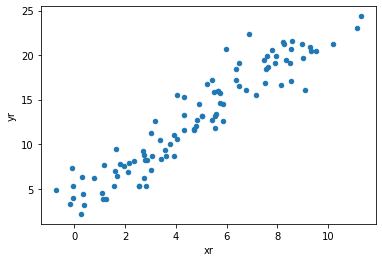

In [5]:
plt.figure(figsize=(6,3))       # プロット
df.plot( kind='scatter', x='xr', y='yr' )
plt.savefig('stCorr01.eps')

In [6]:
cr = df.corr()  # 相関係数の算出
display( cr )   # 内容確認
type( cr )      # データ型の調査

x         y        xr        yr
x   1.000000  1.000000  0.944194  0.984538
y   1.000000  1.000000  0.944194  0.984538
xr  0.944194  0.944194  1.000000  0.942589
yr  0.984538  0.984538  0.942589  1.000000

pandas.core.frame.DataFrame

### 4.8.2　共分散

In [7]:
df.cov()

x          y         xr         yr
x    8.416667  16.833333   8.000128  16.653677
y   16.833333  33.666667  16.000255  33.307354
xr   8.000128  16.000255   8.529654  16.050761
yr  16.653677  33.307354  16.050761  33.995002

In [8]:
df.cov( ddof=0 )

x          y         xr         yr
x    8.332500  16.665000   7.920126  16.487140
y   16.665000  33.330000  15.840253  32.974281
xr   7.920126  15.840253   8.444358  15.890253
yr  16.487140  32.974281  15.890253  33.655052

In [9]:
# NumPyの共分散を使用する
print( 'Xrの分散:', Xr.var(ddof=0) )
print( 'Yrの分散:', Yr.var(ddof=0) )
print( '分散・共分散行列:' )
display( np.cov( Xr, Yr, ddof=0 ) )

Xrの分散: 8.444357752612126
Yrの分散: 33.65505161564871
分散・共分散行列:


array([[ 8.44435775, 15.89025338],
       [15.89025338, 33.65505162]])

In [10]:
# NumPyの共分散を使用する
print( 'Xrの分散:', Xr.var(ddof=1) )
print( 'Yrの分散:', Yr.var(ddof=1) )
print( '分散・共分散行列:' )
display( np.cov( Xr, Yr, ddof=1 ) )

Xrの分散: 8.529654295567804
Yrの分散: 33.99500163196839
分散・共分散行列:


array([[ 8.5296543 , 16.05076099],
       [16.05076099, 33.99500163]])

### 4.8.3　多項式回帰

In [11]:
np.polyfit(Xr,Yr,deg=1)

array([1.88175985, 3.85204382])

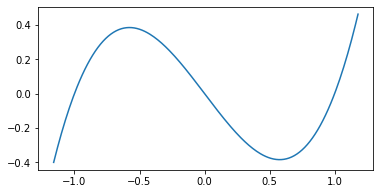

In [12]:
X3 = np.arange(-1.16,1.19,0.01)     # データ列 Y3
Y3 = X3**3 - X3                     # データ列 Y3
plt.figure(figsize=(6,3))   # プロット
plt.plot(X3,Y3)
plt.show()

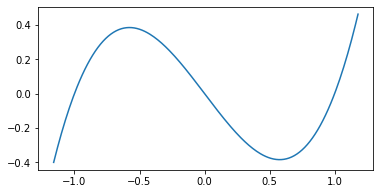

In [13]:
plt.figure(figsize=(6,3))   # プロット
plt.plot(X3,Y3)
plt.savefig('stCorr02.eps')

<Figure size 432x216 with 0 Axes>

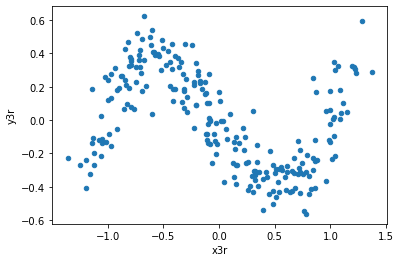

In [14]:
X3r = X3 + 0.1*stats.norm.rvs( size=len(X3) )   # データ列 X3 を撹乱
Y3r = Y3 + 0.1*stats.norm.rvs( size=len(Y3) )   # データ列 Y3 を撹乱
# DataFrameの作成
df3 = pd.DataFrame(columns=('x3','y3','x3r','y3r'))
df3['x3']  = X3;   df3['y3']  = Y3
df3['x3r'] = X3r;  df3['y3r'] = Y3r
plt.figure(figsize=(6,3))       # プロット
df3.plot( kind='scatter', x='x3r', y='y3r' )
plt.show()

<Figure size 432x216 with 0 Axes>

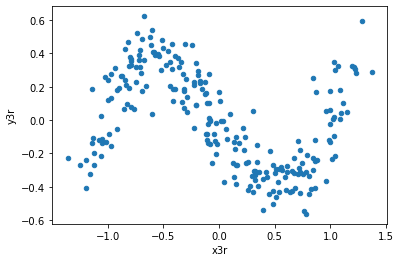

In [15]:
plt.figure(figsize=(6,3))       # プロット
df3.plot( kind='scatter', x='x3r', y='y3r' )
plt.savefig('stCorr03.eps')

In [16]:
np.polyfit(X3r,Y3r,deg=3)

array([ 0.72993112,  0.0381801 , -0.82463282, -0.02780407])